In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [ ]:
# create a classification dataset
X,y = make_classification(n_samples=100,n_features=2,n_classes=2,n_informative=1,n_redundant=0,n_clusters_per_class=1,hypercube=False,random_state=41,class_sep=10)

In [ ]:
class LogisticRegression:

    def __init__(self, learning_rate, iterations):
        # Initialize the learning rate and number of iterations
        self.lr = learning_rate
        self.iter = iterations

    def fit(self, X, y):
        # Append a bias term (a column of 1's) to X
        X = np.insert(X, 0, 1, axis=1)

        # Initialize weights
        self.w = np.ones(X.shape[1])

        # Initialize frames to store the frames of plots
        frames = []

        # Set limits for x and y axes
        x_min, x_max = X[:, 1].min(), X[:, 1].max()
        y_min, y_max = X[:, 2].min(), X[:, 2].max()

        # Iterate and update weights using stochastic gradient descent
        for i in range(self.iter):
            # Select a random point to update the weights
            j = np.random.randint(0, X.shape[0])

            # Calculate the sigmoid function for that point
            y_pred = self.sigmoid(np.dot(self.w, X[j]))

            # Update the weights
            self.w += (y[j] - y_pred) * self.lr * X[j]


    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))  # sigmoid implementation




In [ ]:
Model = LogisticRegression(0.1,1000)
Model.fit(X,y)

In [ ]:
_coff, _intercept = Model.w[1:], Model.w[0]

In [ ]:
m = -(_coff[0]/_coff[1])
b = -(_intercept/_coff[1])

In [ ]:
print(min(X[:,0]))
print(max(X[:,0]))
print(min(X[:,1]))
print(max(X[:,1]))

-2.400675837186087
2.144881912632995
-2.980924316139516
2.061587403600519


In [ ]:
x_input = np.linspace(-3,2.5,1000)
y_input = x_input*m +b

(-3.0, 2.0)

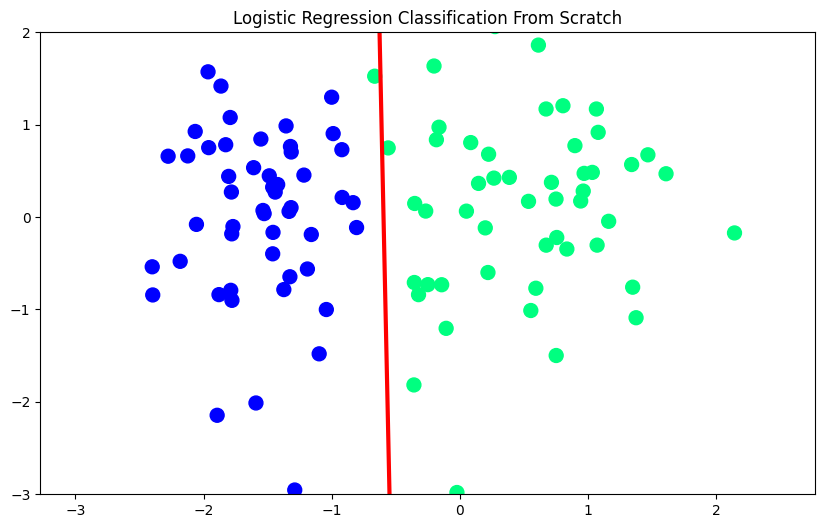

In [ ]:
# plot overall output
plt.figure(figsize=(10,6))
plt.title('Logistic Regression Classification From Scratch')
plt.scatter(X[:,0],X[:,1],c=Y,cmap='winter',s=100)
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.ylim(-3,2)